In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/Colab\ Notebooks/sound_files/

/content/drive/MyDrive/Colab Notebooks/sound_files


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

#FIRフィルタの設計

##LPF

Text(0, 0.5, 'h')

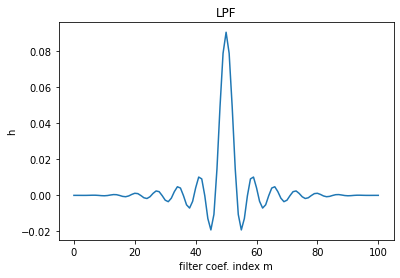

In [ ]:
Fh = 2000 #cut-off frequency
Fs = 44100  #sampling frequency
M = 100 #filter size

fh = Fh / Fs  #norm. cut-off freq.

w = [(-M/2 + i) for i in range(M+1)]
h_hat = [2 * fh * np.sinc(2 * np.pi * fh * k) for idx, k in enumerate(w)]

#hann window func.
w_m = [0.5 - 0.5*np.cos(2*np.pi*m/M) for m in range(M+1)]

#filter coef.
h = np.multiply(w_m, h_hat)

plt.plot(range(M+1),h)
plt.title('LPF')
plt.xlabel('filter coef. index m')
plt.ylabel('h')

##HPF

Text(0, 0.5, 'h')

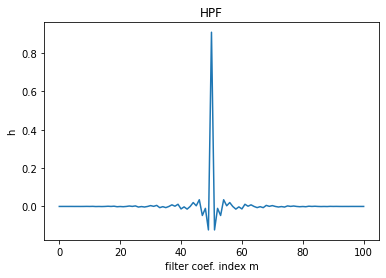

In [ ]:
Fl = 2000
Fs = 44100
M = 100

fl = Fl / Fs

w = [-M/2 + i for i in range(M+1)]
h_hat = np.zeros(len(w))
for idx, k in enumerate(w):
  if k == 0:
    h_hat[idx] = 1 - 2*fl
  else:
    h_hat[idx] = np.sinc(np.pi * k) - 2 * fl * np.sinc(2 * np.pi * fl * k)

#hann window func.
w_m = [0.5 - 0.5*np.cos(2*np.pi*m/M) for m in range(M+1)]

#filter coef.
h = np.multiply(w_m, h_hat)

plt.plot(range(M+1),h)
plt.title('HPF')
plt.xlabel('filter coef. index m')
plt.ylabel('h')

##BPF

Text(0, 0.5, 'h')

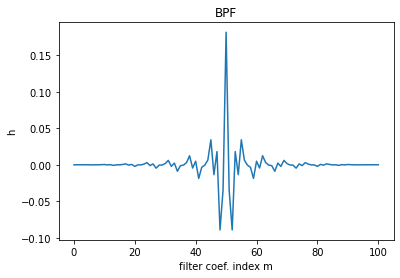

In [ ]:
Fl = 2000
Fh = 6000
Fs = 44100

fl = Fl / Fs
fh = Fh / Fs

w = [-M/2 + i for i in range(M+1)]
h_hat = np.zeros(len(w))
for idx, k in enumerate(w):
  if k == 0:
    h_hat[idx] = 2 * (fh - fl)
  else:
    h_hat[idx] = 2 * fh * np.sinc(2 * np.pi * fh * k) - 2 * fl * np.sinc(2 * np.pi * fl * k)

#hann window func.
w_m = [0.5 - 0.5*np.cos(2*np.pi*m/M) for m in range(M+1)]

#filter coef.
h = np.multiply(w_m, h_hat)

plt.plot(range(M+1),h)
plt.title('BPF')
plt.xlabel('filter coef. index m')
plt.ylabel('h')

#IIRフィルタ

##ノッチフィルタ（2次）


#wave

##wave write

In [ ]:
import wave
import numpy as np

def make_sinewave(file_name, f, fs=44100, t=1, amp=15000):
  t = np.linspace(0.0, 1.0*t, fs * t)
  w = amp * (np.sin(2*np.pi*f*t))
  data = w.astype('int16')
  out = wave.open(file_name, 'w')
  out.setnchannels(1)
  out.setsampwidth(2)
  out.setframerate(fs)
  out.writeframes(data.tostring())
  out.close()

In [ ]:
file_name = '440Hz.wav'
f = 440

make_sinewave(file_name, f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  if sys.path[0] == '':


In [ ]:
import wave
import numpy as np

def make_sinewave_stereo(file_name,
                         f_L, f_R,
                         fs = 44100, t=1,
                         amp_L=15000, amp_R=15000):
  t = np.linspace(0.0, 1.0*t, fs*t)
  w_L = amp_L * np.sin(2 * np.pi * f_L * t)
  w_R = amp_R * np.sin(2 * np.pi * f_R * t)

  w = np.array([w_L, w_R]).transpose()
  data = w.astype('int16')
  out = wave.open(file_name, 'w')
  out.setnchannels(2)
  out.setsampwidth(2)
  out.setframerate(fs)
  out.writeframes(data.tostring())
  out.close()

In [ ]:
file_name = '440_442_5sec_stereo.wav'
f_L, f_R = 440, 442
t = 5

make_sinewave_stereo(file_name, f_L=f_L, f_R=f_R, t=t)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


In [ ]:
f_L, f_R = 440, 440
amp_L, amp_R = 15000, 18000

make_sinewave_stereo(file_name='440_440_15000_18000_5sec_stereo.wav', f_L=f_L, f_R=f_R, t=5, amp_L=amp_L, amp_R=amp_R)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.


##wave read

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt

def read_wave(file_name, tlim=[0.0, 0.2]):

  with wave.open(file_name) as wav:
    sampling_frequency = wav.getframerate() #標本化周波数
    sample_size = wav.getnframes()          #サンプル数
    sample_width = wav.getsampwidth()       #サンプルサイズをバイト数で返す
    channels = wav.getnchannels()           #モノラル、ステレオ
    waveform = wav.readframes(sample_size)  #waveデータ読み込み
    waveform = np.frombuffer(waveform, dtype=np.int16)  #バイナリデータから整数型に型変換

  #ステレオだとデータが倍あるので、一つのarrayにまとめてグラフに出力
  if channels==2:
    monoral = []
    for i in range(0, len(waveform), 2):
      monoral.append((waveform[i] + waveform[i+1]) / 2)
    waveform = np.array(monoral)

  time = np.arange(sample_size) / sampling_frequency
  plt.figure(figsize=(16, 9))
  plt.plot(time, waveform)
  plt.xlim(tlim)
  plt.title('waveform')
  plt.xlabel('time[sec]')
  plt.ylabel('value')

  return waveform


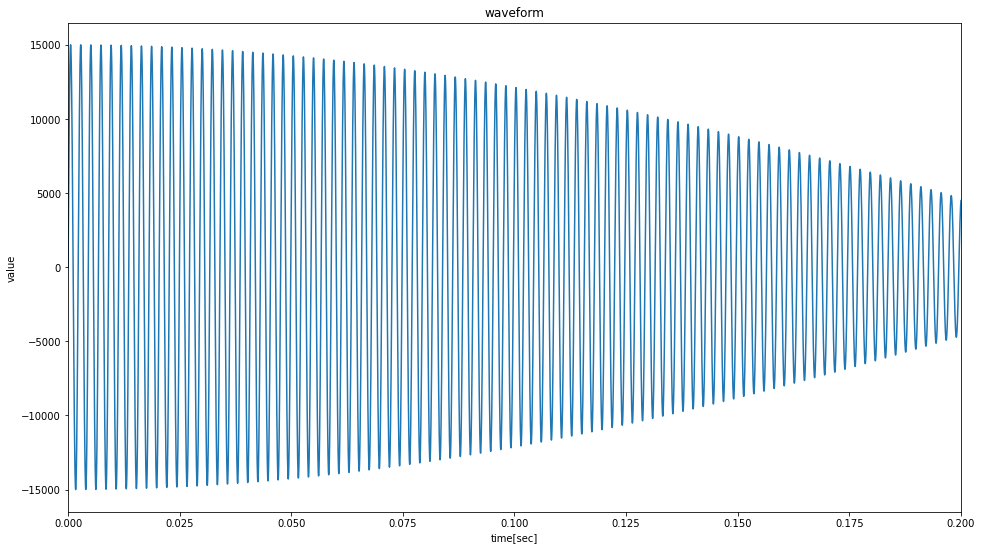

In [ ]:
file_name = '440_442_5sec_stereo.wav'
wave_440_442 = read_wave(file_name)

#ソース・フィルタモデル

Text(0, 0.5, 'value')

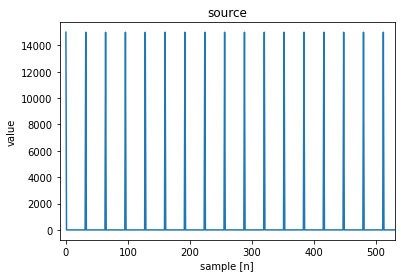

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#音源をパルス列で表現
#パルス間隔は32
g_n = np.zeros(2048)
for i in range(0, 2048, 32):
  g_n[i] = 15000

n = np.arange(0,2048)

plt.plot(n,g_n)
plt.xlim(-10,530)
plt.title('source')
plt.xlabel('sample [n]')
plt.ylabel('value')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'value')

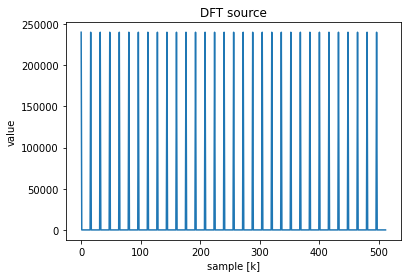

In [ ]:
FFT_size = 512
G_k = np.fft.fft(g_n, FFT_size)

plt.plot(range(FFT_size), G_k)
plt.title('DFT source')
plt.xlabel('sample [k]')
plt.ylabel('value')

Text(0, 0.5, 'value')

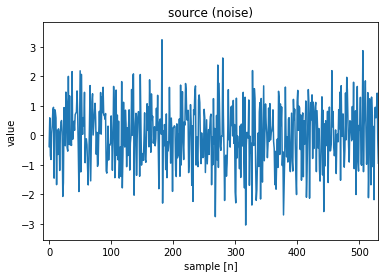

In [ ]:
g_noise = np.zeros(2048)
for i in range(2048):
  g_noise[i] = np.random.randn()

n = np.arange(0,2048)

plt.plot(n,g_noise)
plt.xlim(-10,530)
plt.title('source (noise)')
plt.xlabel('sample [n]')
plt.ylabel('value')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'value')

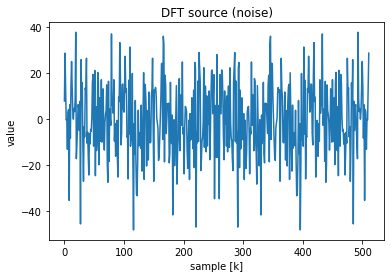

In [ ]:
FFT_size = 512
G_k_noise = np.fft.fft(g_noise, FFT_size)


plt.plot(range(FFT_size), G_k_noise)
plt.title('DFT source (noise)')
plt.xlabel('sample [k]')
plt.ylabel('value')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, '|G(k)| (N=1)')

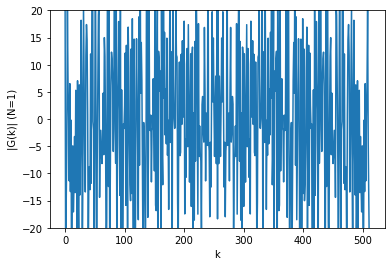

In [ ]:
N = 1
FFT_size = 512
g_noise = np.zeros(2048)
G_N = np.zeros(512)

for j in range(N):
  for i in range(2048):
    g_noise[i] = np.random.randn()

  G_k_noise = np.fft.fft(g_noise, FFT_size)
  G_N += G_k_noise.astype('f')
  G_N /= N

plt.plot(range(FFT_size), G_N)
plt.ylim(-20,20)
plt.xlabel('k')
plt.ylabel(f'|G(k)| (N={N})')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, '|G(k)| (N=10)')

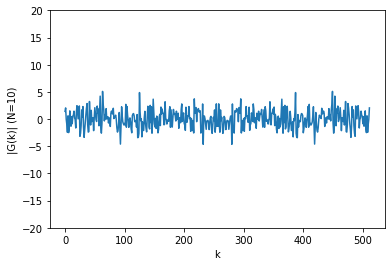

In [ ]:
N = 10
FFT_size = 512
g_noise = np.zeros(2048)
G_N = np.zeros(512)

for j in range(N):
  for i in range(2048):
    g_noise[i] = np.random.randn()

  G_k_noise = np.fft.fft(g_noise, FFT_size)
  G_N += G_k_noise.astype('f')
  G_N /= N

plt.plot(range(FFT_size), G_N)
plt.ylim(-20,20)
plt.xlabel('k')
plt.ylabel(f'|G(k)| (N={N})')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, '|G(k)| (N=100)')

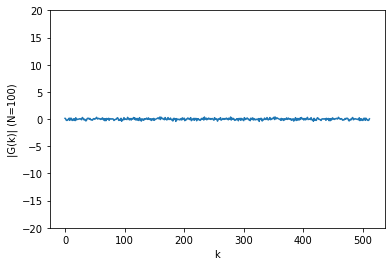

In [ ]:
N = 100
FFT_size = 512
g_noise = np.zeros(2048)
G_N = np.zeros(512)

for j in range(N):
  for i in range(2048):
    g_noise[i] = np.random.randn()

  G_k_noise = np.fft.fft(g_noise, FFT_size)
  G_N += G_k_noise.astype('f')
  G_N /= N

plt.plot(range(FFT_size), G_N)
plt.ylim(-20,20)
plt.xlabel('k')
plt.ylabel(f'|G(k)| (N={N})')

#反復位相復元

##仕込み

In [ ]:
from pydub import AudioSegment

file_name = '/content/drive/MyDrive/Colab Notebooks/sound_files/SakuraAyane_name.mp3'

Audio = AudioSegment.from_mp3(file_name)
Audio
wave = Audio.export('SakuraAyane_name.wav', format='wav')
wave.close()

###スペクトログラム

wave読み込み

Text(0, 0.5, 'value')

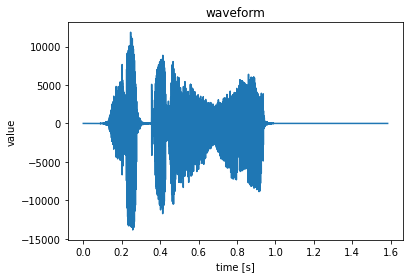

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave

file_name = '/content/drive/MyDrive/Colab Notebooks/sound_files/SakuraAyane_name.wav'
with wave.open(file_name) as wav:
  sample_size = wav.getnframes()
  sampling_frequency = wav.getframerate()
  waveform = wav.readframes(sample_size)
  waveform = np.frombuffer(waveform, dtype='int16')

time = np.arange(len(waveform)) / sampling_frequency

plt.plot(time, waveform)
plt.title('waveform')
plt.xlabel('time [s]')
plt.ylabel('value')


スペクトログラム

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprec

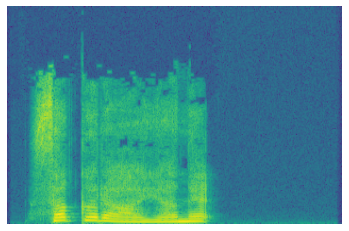

In [ ]:
FFT_size = 512
frame_size = int(0.01 * sampling_frequency)
frame_shift = int(0.005 * sampling_frequency)

num_frames = (sample_size - frame_size) // frame_shift + 1
spectrogram = np.zeros((num_frames, np.int(FFT_size / 2) + 1))

for idx in range(num_frames):
  #開始位置（インデックス番号）
  start_idx = idx * frame_shift

  #STFTをかけるサンプルを切り出し,窓関数と積算
  frame = waveform[start_idx : start_idx + frame_size].copy()
  frame = frame * np.hanning(frame_size)

  #スペクトル生成
  spectrum = np.fft.fft(frame, n=FFT_size)
  absolute = np.abs(spectrum)
  absolute = absolute[: np.int(FFT_size / 2) + 1]
  log_spectrum = np.log(absolute + 1e-7)

  #スペクトログラムに付加
  spectrogram[idx ,  : ] = log_spectrum

#spectrogram -= np.max(spectrogram)
#vmax = np.abs(np.min(spectrogram)) * 0.0
#vmin = - np.abs(np.min(spectrogram)) * 0.7

#プロット
img = plt.imshow(spectrogram.T[-1::-1, :], extent=[0, sample_size / sampling_frequency, 0, sampling_frequency / 2], cmap='viridis', aspect='auto')
plt.axis("off")
plt.savefig('SakuraAyane_name.png')

#Pydubモジュール
ファイル形式の変換


In [ ]:
!pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydub import AudioSegment

file_name = '/content/drive/MyDrive/Colab Notebooks/sound_files/SakuraAyane_name.mp3'

Audio = AudioSegment.from_mp3(file_name)
Audio
wave = Audio.export('SakuraAyane_name.wav', format='wav')
wave.close()

#単一マイクロホンによるノイズ除去システム

##ウィーナーフィルタ

###準備-ノイズ付加

(0.0, 1.0)

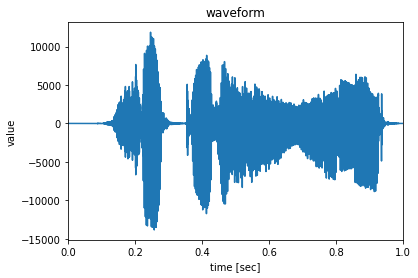

In [ ]:
#準備
import numpy as np
import matplotlib.pyplot as plt
import wave

file_name = './SakuraAyane_name.wav'

with wave.open(file_name) as wav:
  num_samples = wav.getnframes()
  sampling_frequency = wav.getframerate()
  waveform = wav.readframes(num_samples)
  waveform = np.frombuffer(waveform, dtype='int16')

time = np.arange(len(waveform)) / sampling_frequency

plt.plot(time, waveform)
plt.title('waveform')
plt.xlabel('time [sec]')
plt.ylabel('value')
plt.xlim([0.0, 1.0])

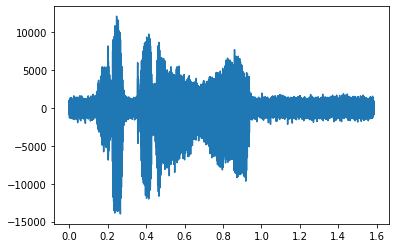

In [ ]:
S = waveform
D = np.random.randn(S.shape[0]) * 500  #白色ノイズ
X = S + D #ノイズ付加

plt.plot(time, X)
#plt.xlim([0.5, 0.7])

In [ ]:
#waveファイルとして書き出し
data = X.astype('int16')
out = wave.open('AyaneSakura_name_noise.wav', 'w')
out.setnchannels(1)
out.setsampwidth(2)
out.setframerate(sampling_frequency)
out.writeframes(data.tostring())
out.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  import sys


###簡易版
https://www.ieice-hbkb.org/files/01/01gun_05hen_05m.pdf

In [ ]:
H = X2l - sigma2d / (X2l + 1e-8)

In [ ]:
S_hat = Pxx * H
t, s_filted = scipy.signal.istft(S_hat, fs=fs)

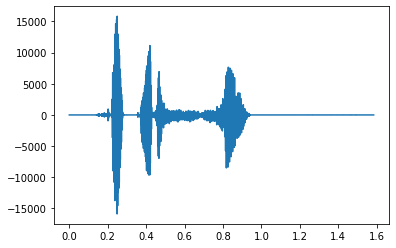

In [ ]:
plt.plot(t, s_filted)

In [ ]:
s_filted /= 1e7

In [ ]:
s_filted *= 2

In [ ]:
data = s_filted.astype('int16')
out = wave.open('AyaneSakura_name_filted.wav', 'w')
out.setnchannels(1)
out.setsampwidth(2)
out.setframerate(fs)
out.writeframes(data.tostring())
out.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


###ちゃんと版

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import scipy.signal

file_name = './AyaneSakura_name_noise.wav'

with wave.open(file_name) as wav:
  fs = wav.getframerate()
  num_samples = wav.getnframes()
  waveform = wav.readframes(num_samples)
  waveform = np.frombuffer(waveform, dtype='int16')


(0.0, 1.0)

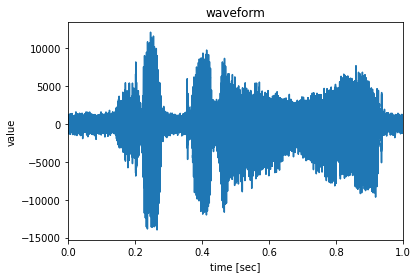

In [ ]:
time = np.arange(len(waveform)) / fs

plt.plot(time, waveform)
plt.title('waveform')
plt.xlabel('time [sec]')
plt.ylabel('value')
plt.xlim([0.0, 1.0])

In [ ]:
frame_size = 512
frame_shift = frame_size // 2

In [ ]:
frq, t, Pxx = scipy.signal.stft(waveform.copy(), fs=fs, window='hann', nperseg=frame_size, noverlap=frame_shift)

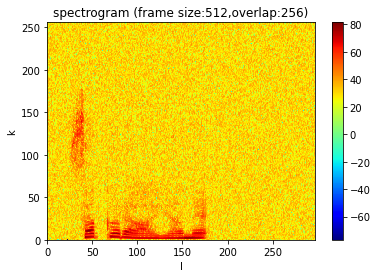

In [ ]:
Pxx_spectrogram = Pxx.copy()
log_Pxx = 10 * np.log(np.abs(Pxx_spectrogram))
plt.pcolormesh(range(len(t)), range(len(frq)), log_Pxx, cmap='jet')
plt.title(f'spectrogram (frame size:{frame_size},overlap:{frame_shift})')
plt.xlabel('l')
plt.ylabel('k')
plt.colorbar()
plt.show()
plt.close()

In [ ]:
Pxx.shape

(257, 298)

In [ ]:
Q = 10
X2abs = np.power(np.abs(Pxx.copy()), 2)
sigma2d = np.sum(X2abs[:, 0:Q].copy(), axis=1) / Q

In [ ]:
Pxx.shape[0]

257

In [ ]:
beta = 0.98

S_HAT = np.zeros_like(Pxx)
S_l = np.zeros(Pxx.shape[0])

for l in range(Pxx.shape[1]):
  gamma = X2abs[:, l] / sigma2d
  for k in range(Pxx.shape[0]):
    xi = beta * (S_l / sigma2d)
    if gamma[k] > 0:
      xi += (1 - beta) * (gamma[k] - 1)

  G_wf = xi / (1 + xi)

  S_l = Pxx[: , l] * G_wf
  S_HAT[:, l] = S_l

Text(0, 0.5, 'value')

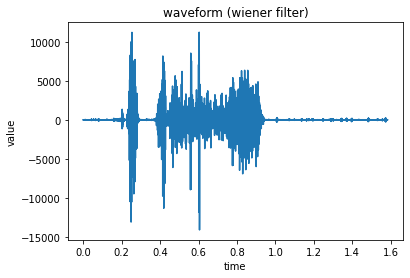

In [ ]:
time_filted, s_filted = scipy.signal.istft(S_HAT, fs=fs, window='hann', nperseg=frame_size, noverlap=frame_shift)
plt.plot(time_filted, s_filted)
plt.title('waveform (wiener filter)')
plt.xlabel('time')
plt.ylabel('value')

In [ ]:
data = s_filted.astype('int16')
out = wave.open('AyaneSakura_name_wiener_filted.wav', 'w')
out.setnchannels(1)
out.setsampwidth(2)
out.setframerate(fs)
out.writeframes(data.tostring())
out.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


Text(0, 0.5, 'value')

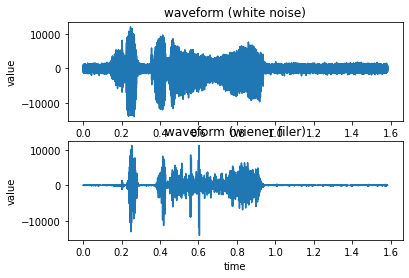

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(time, waveform)
plt.title('waveform (white noise)')
plt.xlabel('time')
plt.ylabel('value')
plt.subplot(2, 1, 2)
plt.plot(time_filted, s_filted)
plt.title('waveform (wiener filer)')
plt.xlabel('time')
plt.ylabel('value')

#MAP推定法

準備

(0.0, 1.0)

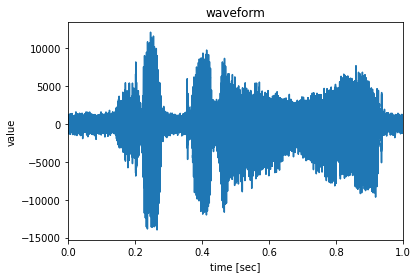

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import scipy.signal
import cmath

file_name = './AyaneSakura_name_noise.wav'

with wave.open(file_name) as wav:
  fs = wav.getframerate()
  num_samples = wav.getnframes()
  waveform = wav.readframes(num_samples)
  waveform = np.frombuffer(waveform, dtype='int16')

time = np.arange(len(waveform)) / fs

plt.plot(time, waveform)
plt.title('waveform')
plt.xlabel('time [sec]')
plt.ylabel('value')
plt.xlim([0.0, 1.0])


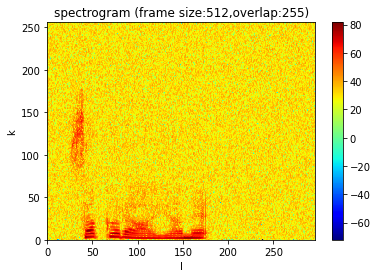

In [ ]:
frame_size = 512
frame_shift = frame_size // 2 - 1

frq, t, Pxx = scipy.signal.stft(waveform.copy(), fs=fs, window='hann', nperseg=frame_size, noverlap=frame_shift)

Pxx_spectrogram = Pxx.copy()
log_Pxx = 10 * np.log(np.abs(Pxx_spectrogram))
plt.pcolormesh(range(len(t)), range(len(frq)), log_Pxx, cmap='jet')
plt.title(f'spectrogram (frame size:{frame_size},overlap:{frame_shift})')
plt.xlabel('l')
plt.ylabel('k')
plt.colorbar()
plt.show()
plt.close()

In [ ]:
Q = 10
mu = 1.74
new = 0.126
X2abs = np.power(np.abs(Pxx.copy()), 2)
sigma2d = np.sum(X2abs[:, 0:Q].copy(), axis=1) / Q

beta = 0.98

S_HAT = np.zeros_like(Pxx)
S_l = np.zeros(Pxx.shape[0])
sq = np.zeros(Pxx.shape[0], dtype=np.complex64)

for l in range(Pxx.shape[1]):
  gamma = X2abs[:, l] / sigma2d
  for k in range(Pxx.shape[0]):
    xi = beta * (S_l / sigma2d)
    if gamma[k] > 0:
      xi += (1 - beta) * (gamma[k] - 1)
    sq[k] = cmath.sqrt(gamma[k] * xi[k])

  u = 0.5 - mu / (4 * sq)
  G_LV = u + (u**2 + new / (2 * gamma))**0.5
  S_l = Pxx[: , l] * G_LV
  S_HAT[:, l] = S_l

In [ ]:
S_HAT

Text(0, 0.5, 'value')

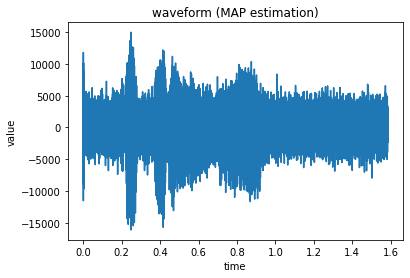

In [ ]:
time_filted, s_filted = scipy.signal.istft(S_HAT, fs=fs, window='hann', nperseg=frame_size, noverlap=frame_shift)
plt.plot(time_filted, s_filted)
plt.title('waveform (MAP estimation)')
plt.xlabel('time')
plt.ylabel('value')

In [ ]:
data = s_filted.astype('int16')
out = wave.open('AyaneSakura_name_MAP_filted.wav', 'w')
out.setnchannels(1)
out.setsampwidth(2)
out.setframerate(fs)
out.writeframes(data.tostring())
out.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


Text(0, 0.5, 'value')

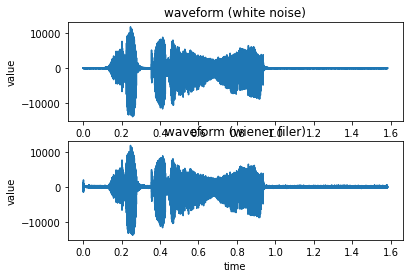

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(time, waveform)
plt.title('waveform (white noise)')
plt.xlabel('time')
plt.ylabel('value')
plt.subplot(2, 1, 2)
plt.plot(time_filted, s_filted)
plt.title('waveform (wiener filer)')
plt.xlabel('time')
plt.ylabel('value')

#適応フィルタ

##NLMS(normalized least mean square algorithm)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import cmath

file_name_x = './SakuraAyane_name.wav'
file_name_d = './AyaneSakura_name_noise.wav'



##適応線スペクトル強調器
(ALE : adaptive line enhancer)

440Hzの正弦波をインポート

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import cmath
import scipy.signal

file_name = './440Hz.wav'

with wave.open(file_name) as wav:
  fs = wav.getframerate()
  num_samples = wav.getnframes()
  waveform = wav.readframes(num_samples)
  waveform = np.frombuffer(waveform, dtype=np.int16)


振幅が同じの白色雑音を付加

In [ ]:
noise_x = np.random.uniform(low=-15000, high=15000, size=len(waveform))
x_n = (waveform + noise_x) * 0.5

定数、配列の宣言

In [ ]:
#定数はこれね
M = 500
D = 10
u = 0.001

#各配列宣言
h_m = np.zeros(M)
x_n_delay = np.append(x_n.copy(), np.zeros(D+M))
y_n = np.zeros(len(x_n))
e_n = np.zeros(len(x_n))
h_trans = []
h_trans.append(h_m)

ALEアルゴリズム(音響音声信号処理の基礎と実践, pp130-134)

In [ ]:
for idx in range(len(x_n)):
  x_frame = x_n_delay[idx + D : idx + D + M]
  x_frame_2 = np.sum(np.power(x_frame.copy(),2)) + 1e-8
  y_n[idx] = np.sum(h_m * x_frame)
  e_n[idx] = x_n_delay[idx] - y_n[idx]
  #フィルタ係数の更新
  for m in range(M):
    h_m[m] = h_m[m] + u * (x_n_delay[idx + m] * e_n[idx] / x_frame_2)
  h_trans.append(h_m)

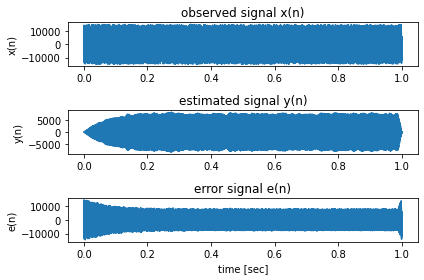

In [ ]:
plt.subplot(3, 1, 1)
plt.plot(t, x_n)
plt.title('observed signal x(n)')
plt.ylabel('x(n)')

plt.subplot(3, 1, 2)
plt.plot(t, y_n)
plt.title('estimated signal y(n)')
plt.ylabel('y(n)')

plt.subplot(3, 1, 3)
plt.plot(t, e_n)
plt.title('error signal e(n)')
plt.xlabel('time [sec]')
plt.ylabel('e(n)')

plt.tight_layout()

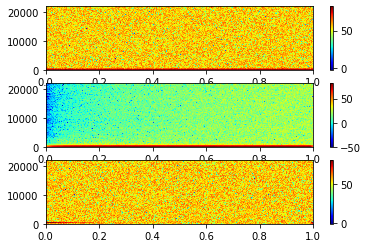

In [ ]:
plt.subplot(3, 1, 1)
frqX, timeX, Xxx = scipy.signal.stft(x_n, fs=fs)
plt.pcolormesh(timeX, frqX, 10 * np.log(np.abs(Xxx)), cmap='jet')
plt.colorbar()

plt.subplot(3, 1, 2)
frqY, timeY, Yxx = scipy.signal.stft(y_n, fs=fs)
plt.pcolormesh(timeY, frqY, 10 * np.log(np.abs(Yxx)), cmap='jet')
plt.colorbar()

plt.subplot(3, 1, 3)
frqE, timeE, Exx = scipy.signal.stft(e_n, fs=fs)
plt.pcolormesh(timeE, frqE, 10 * np.log(np.abs(Exx)), cmap='jet')
plt.colorbar()

plt.show()
plt.tight_layout()
plt.close()

##ALEによる音声の白色雑音除去
(ALE : adaptive line enhancer)

白色雑音が付加された音声のインポート

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import cmath
import scipy.signal

file_name = './AyaneSakura_name_noise.wav'

with wave.open(file_name) as wav:
  fs = wav.getframerate()
  num_samples = wav.getnframes()
  x_n = wav.readframes(num_samples)
  x_n = np.frombuffer(x_n, dtype=np.int16)

x_n = x_n[ : fs - 1]
t = np.arange(len(x_n)) / fs


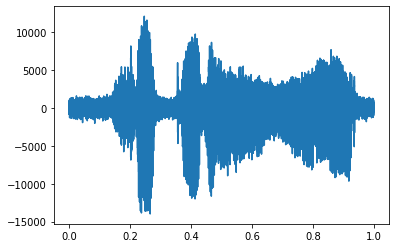

In [ ]:
plt.plot(t, x_n)

定数、配列の宣言

In [ ]:
#定数はこれね
M = 500
D = 1
u = 0.001

#各配列宣言
h_m = np.zeros(M)
x_n_delay = np.append(x_n.copy(), np.zeros(D+M))
y_n = np.zeros(len(x_n))
e_n = np.zeros(len(x_n))
h_trans = []
h_trans.append(h_m)

ALEアルゴリズム(音響音声信号処理の基礎と実践, pp130-134)

In [ ]:
for idx in range(len(x_n)):
  x_frame = x_n_delay[idx + D : idx + D + M]
  x_frame_2 = np.sum(np.power(x_frame.copy(),2)) + 1e-8
  y_n[idx] = np.sum(h_m * x_frame)
  e_n[idx] = x_n_delay[idx] - y_n[idx]
  #フィルタ係数の更新
  for m in range(M):
    h_m[m] = h_m[m] + u * (x_n_delay[idx + m] * e_n[idx] / x_frame_2)
  h_trans.append(h_m)

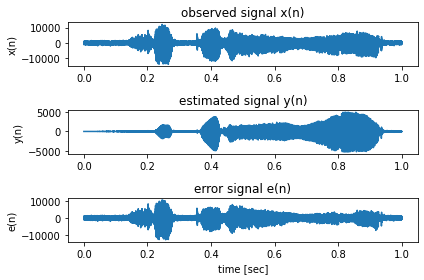

In [ ]:
plt.subplot(3, 1, 1)
plt.plot(t, x_n)
plt.title('observed signal x(n)')
plt.ylabel('x(n)')

plt.subplot(3, 1, 2)
plt.plot(t, y_n)
plt.title('estimated signal y(n)')
plt.ylabel('y(n)')

plt.subplot(3, 1, 3)
plt.plot(t, e_n)
plt.title('error signal e(n)')
plt.xlabel('time [sec]')
plt.ylabel('e(n)')

plt.tight_layout()

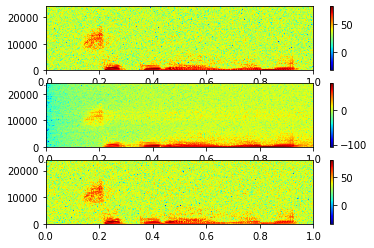

In [ ]:
plt.subplot(3, 1, 1)
frqX, timeX, Xxx = scipy.signal.stft(x_n, fs=fs)
plt.pcolormesh(timeX, frqX, 10 * np.log(np.abs(Xxx)), cmap='jet')
plt.colorbar()

plt.subplot(3, 1, 2)
frqY, timeY, Yxx = scipy.signal.stft(y_n, fs=fs)
plt.pcolormesh(timeY, frqY, 10 * np.log(np.abs(Yxx)), cmap='jet')
plt.colorbar()

plt.subplot(3, 1, 3)
frqE, timeE, Exx = scipy.signal.stft(e_n, fs=fs)
plt.pcolormesh(timeE, frqE, 10 * np.log(np.abs(Exx)), cmap='jet')
plt.colorbar()

plt.show()
plt.tight_layout()
plt.close()

音声出力

In [ ]:
data = y_n.astype('int16')
out = wave.open('AyaneSakura_name_ALE_filted.wav', 'w')
out.setnchannels(1)
out.setsampwidth(2)
out.setframerate(fs)
out.writeframes(data.tostring())
out.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


#音響エフェクト

準備

Text(0, 0.5, 'value')

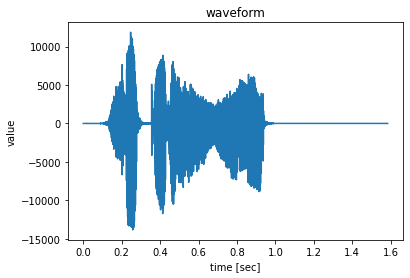

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import cmath

file_name = './SakuraAyane_name.wav'

with wave.open(file_name) as wav:
  fs = wav.getframerate()
  num_samples = wav.getnframes()
  waveform = wav.readframes(num_samples)
  waveform = np.frombuffer(waveform, dtype=np.int16)

t = np.arange(len(waveform)) / fs

plt.plot(t, waveform)
plt.title('waveform')
plt.xlabel('time [sec]')
plt.ylabel('value')

##エコー

音が壁などに反射して戻ってくる現象として説明される。こだま、やまびこ、残響などが挙げられる。直接音と残響音の重ね合わせで観測される。

In [ ]:
#例題6.1
x_n = waveform.copy()
frame_size = len(x_n)

D0 = int(0 / 8 * fs)
D1 = int(1 / 8 * fs)
D2 = int(2 / 8 * fs)
D3 = int(3 / 8 * fs)

y_n = np.zeros(len(waveform) + D3)

y_n[D0 : D0 + frame_size] += x_n
y_n[D1 : D1 + frame_size] += 0.8 * x_n
y_n[D2 : D2 + frame_size] += 0.7 * x_n
y_n[D3 : D3 + frame_size] += 0.6 * x_n

Text(0, 0.5, 'value')

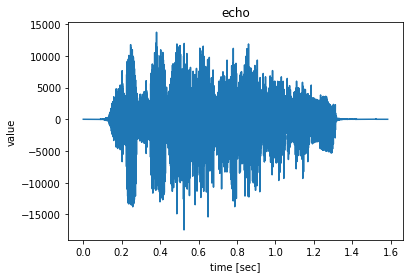

In [ ]:
plt.plot(t, y_n[ : -D3])
plt.title('echo')
plt.xlabel('time [sec]')
plt.ylabel('value')

In [ ]:
data = y_n.astype('int16')
out = wave.open('AyaneSakura_name_echo.wav', 'w')
out.setnchannels(1)
out.setsampwidth(2)
out.setframerate(fs)
out.writeframes(data.tostring())
out.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


##ディレイ

基本的にはエコーと同じ。デジタル信号処理の観点から、遅延量とフィルタ係数を個々に設定しなければならないエコー生成フィルタは汎用性に乏しい。ディレイは一定の遅延量D毎に、フィルタ係数がべき乗で減衰するFIRフィルタである。

$$
y(n) = \sum_{m=0} ^M = \alpha^mx(n-mD)
$$
ただし$\alpha<1$である

In [ ]:
a0 = 0.9
D = 6000
M = 8

x_n = waveform.copy()
y_n = np.zeros(len(x_n))
x_n = np.append(x_n, np.zeros((M+1)*D))


for idx in tqdm(range(len(y_n))):
  for m in range(M+1):
    y_n[idx] += (a0**m) * x_n[idx + m*D]

100%|██████████| 76032/76032 [00:00<00:00, 91704.93it/s] 


Text(0, 0.5, 'value')

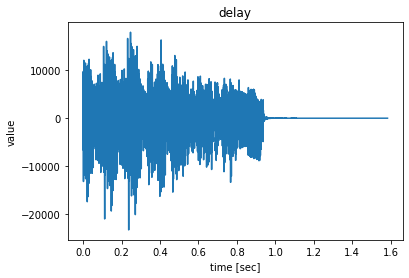

In [ ]:
plt.plot(t, y_n)
plt.title('delay')
plt.xlabel('time [sec]')
plt.ylabel('value')

In [ ]:
data = y_n.astype('int16')
out = wave.open('AyaneSakura_name_delay.wav', 'w')
out.setnchannels(1)
out.setsampwidth(2)
out.setframerate(fs)
out.writeframes(data.tostring())
out.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  


#No Title